In [45]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from cv2 import cv2 as cv

In [64]:
ORIGINAL_IMAGE_PATH = "./data/sample.png"
RESULTS_DIR = "./results/"

In [65]:
original = cv.imread(ORIGINAL_IMAGE_PATH)
cv.imwrite("./data/sample2.png", original)
# plt.imshow(original)
# rbg_image = np.delete(original,3,2)
# print(rbg_image.shape)
rbg_image = original

(9, 13)


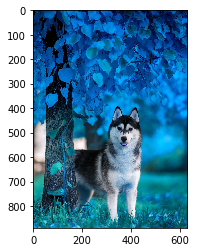

In [66]:
n = 64 #32
nH = int(rbg_image.shape[0]/n)
nW = int(rbg_image.shape[1]/n)
print((nW, nH))
parts = np.zeros((nH,nW,n,n,3))
part_shape = (n,n,3)
for h in range(nH):
    for w in range(nW):
        ww=w+1
        hh=h+1
        parts[h,w]= rbg_image[h*n:hh*n,w*n:ww*n]
plt.imshow(original)

In [67]:
rbg_image[0:64,0:64].shape

(64, 64, 3)

In [91]:
hashManager = cv.img_hash.RadialVarianceHash_create()
hashes = []
for h in range(nH):
    for w in range(nW):
        hashes.append(hashManager.compute(np.uint8(parts[h,w]))[0])

In [92]:
np.array(hashes).shape

(117, 40)

In [93]:
hashes

[array([133,  58, 255,   2,   0, 155, 119, 146, 101, 110, 113, 171, 122,
        129, 123, 127, 128, 157, 108, 150, 128, 127, 133, 136, 133, 144,
        118, 147, 123, 138, 140, 126, 137, 135, 129, 146, 128, 136, 136,
        132], dtype=uint8),
 array([101, 255, 162,   0,  36, 173, 154,  61,  83, 105, 123,  79,  81,
         95, 118,  99,  96,  87, 117, 104,  93,  92, 102, 102, 106,  94,
         99, 101, 103, 103, 101,  97, 100,  99, 102, 104, 100, 101, 102,
        100], dtype=uint8),
 array([156,  70,  62, 109, 231, 153,   0, 109, 186, 140, 137, 255, 162,
        216, 160, 124, 173, 132, 166, 183, 134, 180, 156, 128, 165, 145,
        161, 171, 148, 163, 157, 155, 157, 151, 165, 150, 154, 150, 143,
        175], dtype=uint8),
 array([132,   0, 255, 199,  66, 130, 130, 157, 141, 124, 144, 120,  95,
        162, 170, 143, 122, 143, 149, 144, 112, 140, 157, 129, 130, 135,
        118, 107, 121, 128, 141, 127, 118, 135, 137, 130, 131, 137, 140,
        138], dtype=uint8),
 array([109,

In [90]:
hashManager.compute(np.uint8(parts[0,0]))

array([[133,  58, 255,   2,   0, 155, 119, 146, 101, 110, 113, 171, 122,
        129, 123, 127, 128, 157, 108, 150, 128, 127, 133, 136, 133, 144,
        118, 147, 123, 138, 140, 126, 137, 135, 129, 146, 128, 136, 136,
        132]], dtype=uint8)

In [94]:
from Crypto.Cipher import DES

